# This is notebook shows classification of MNIST digits with MLP using TensorFlow+Keras

In [2]:
import tensorflow
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
np.random.seed(42)

## Load and format data

In [4]:
num_features = 784 #(28x28 images)
num_classes = 10

# We can actually load some datasets from the keras library
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

In [5]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

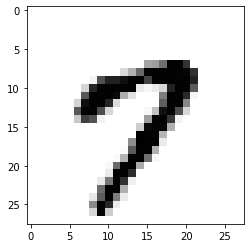

7


In [6]:
observation = 15
plt.imshow(X_train[observation], cmap='Greys')
plt.show()
print(Y_train[observation])

In [7]:
X_train = X_train.reshape(X_train.shape[0], num_features)
X_test = X_test.reshape(X_test.shape[0], num_features)

In [8]:
X_train.shape, X_test.shape

((60000, 784), (10000, 784))

In [9]:
# Normalize the data from integer values to floating point numbers within [0,1] interval
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [10]:
# Saving backups for later
Y_train_vals = Y_train
Y_test_vals = Y_test

# Convert class values to class vectors (one-hot encoding)
Y_train = to_categorical(Y_train, num_classes)
Y_test = to_categorical(Y_test, num_classes)

## Build the model

In [11]:
model = Sequential()
model.add(Dense(350, input_shape=(num_features,), activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

## Train the model on training data

In [12]:
model.fit(X_train, Y_train, epochs=10, batch_size=250, verbose=1, validation_split=0.2)

Epoch 1/10
192/192 [==============================] - 1s 4ms/step - loss: 0.3961 - accuracy: 0.8879 - val_loss: 0.1745 - val_accuracy: 0.9513
Epoch 2/10
192/192 [==============================] - 1s 4ms/step - loss: 0.1465 - accuracy: 0.9579 - val_loss: 0.1291 - val_accuracy: 0.9648
Epoch 3/10
192/192 [==============================] - 1s 4ms/step - loss: 0.0993 - accuracy: 0.9714 - val_loss: 0.1150 - val_accuracy: 0.9659
Epoch 4/10
192/192 [==============================] - 1s 4ms/step - loss: 0.0741 - accuracy: 0.9780 - val_loss: 0.1000 - val_accuracy: 0.9703
Epoch 5/10
192/192 [==============================] - 1s 4ms/step - loss: 0.0559 - accuracy: 0.9831 - val_loss: 0.0924 - val_accuracy: 0.9712
Epoch 6/10
192/192 [==============================] - 1s 5ms/step - loss: 0.0439 - accuracy: 0.9874 - val_loss: 0.0822 - val_accuracy: 0.9763
Epoch 7/10
192/192 [==============================] - 1s 5ms/step - loss: 0.0316 - accuracy: 0.9918 - val_loss: 0.0832 - val_accuracy: 0.9752
Epoch 

## Evaluate the model

In [14]:
# Test the model after training
train_restul = model.evaluate(X_train, Y_train, verbose=0)
print(f'Train results - Loss: {train_restul[0]} - Accuracy: {train_restul[1]}%')

# Test the model after training
test_restul = model.evaluate(X_test, Y_test, verbose=0)
print(f'Test results - Loss: {test_restul[0]} - Accuracy: {test_restul[1]}%')

Train results - Loss: 0.027224605903029442 - Accuracy: 0.9927166700363159%
Test results - Loss: 0.07488014549016953 - Accuracy: 0.9781000018119812%


## Visualize the classification results on the test data

In [68]:
Y_pred_prob = model.predict(X_test)
Y_pred = np.argmax(Y_pred_prob, axis=1)

In [66]:
print('Confusion Matrix:')
print(confusion_matrix(Y_test_vals, Y_pred))
print('Classification Report:')
target_names = ['0','1','2','3','4','5','6','7','8','9']
print(classification_report(Y_test_vals, Y_pred, target_names=target_names))

Confusion Matrix
[[ 969    1    1    1    1    2    2    2    1    0]
 [   0 1124    4    1    0    1    2    1    2    0]
 [   2    0 1017    1    1    0    2    5    4    0]
 [   0    0    8  988    0    5    0    2    4    3]
 [   3    0    5    1  956    0    2    2    1   12]
 [   2    0    0    6    1  875    3    1    4    0]
 [   7    3    3    1    5    7  930    0    2    0]
 [   0    4    9    3    1    1    0 1004    1    5]
 [   1    0    4    8    6    3    2    4  944    2]
 [   2    3    0    7    9    5    1    7    1  974]]
Classification Report
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.99      0.98      1032
           3       0.97      0.98      0.97      1010
           4       0.98      0.97      0.97       982
           5       0.97      0.98      0.98       892
           6       0.99      0.97      0.98       9

In [72]:
cm = pd.DataFrame(confusion_matrix(Y_test_vals, Y_pred), index = target_names, columns = target_names)
cm

,0,1,2,3,4,5,6,7,8,9
0,969,1,1,1,1,2,2,2,1,0
1,0,1124,4,1,0,1,2,1,2,0
2,2,0,1017,1,1,0,2,5,4,0
3,0,0,8,988,0,5,0,2,4,3
4,3,0,5,1,956,0,2,2,1,12
5,2,0,0,6,1,875,3,1,4,0
6,7,3,3,1,5,7,930,0,2,0
7,0,4,9,3,1,1,0,1004,1,5
8,1,0,4,8,6,3,2,4,944,2
9,2,3,0,7,9,5,1,7,1,974


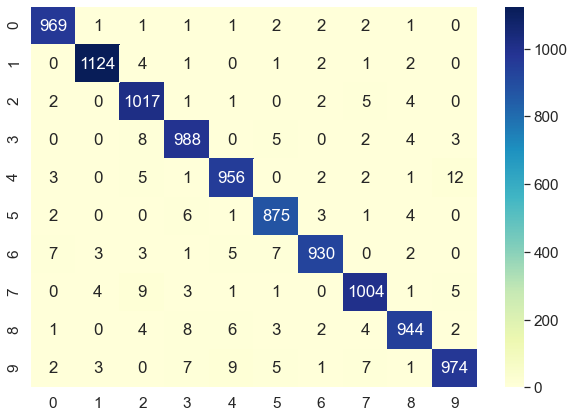

In [74]:
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu")